# 线性回归的TensorFlow实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
print(tf.__version__)

1.14.0


In [2]:
#用于TensorBoard显示的日志文件设置
now = datetime.utcnow().strftime('%Y%m%d%H%M%S')    #时间格式
root_logdir = 'D:\课程与书籍\深度学习入门：基于PyTorch和TensorFlow的理论与实现'      #设置根目录
logdir = '{}/ch03/run-{}'.format(root_logdir, now)     #设置日志的存放目录与命名

### 1.数据集

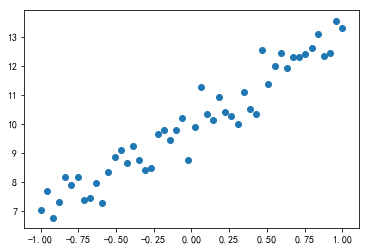

In [3]:
#构造数据集
x_train = np.linspace(-1, 1, 50)
y_train = 3 * x_train + 10 + 0.5 * np.random.randn(x_train.shape[0])
plt.scatter(x_train, y_train)
plt.show()

### 2.输入节点

In [4]:
#对训练数据x_train和y_train创建输入节点
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

### 3.变量节点

In [5]:
#对模型的参数创建变量节点
w1 = tf.Variable(tf.random_normal([1]), name='w1')
w0 = tf.Variable(tf.zeros([1]), name='w0')

### 4.线性模型和损失模型

In [6]:
#线性模型
y_hat = w0 + w1 * x
#均方差损失函数
loss = tf.reduce_mean(tf.square(y_hat - y))

### 5.梯度下降优化器

In [7]:
#梯度下降优化算法，学习率为0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)
#使用梯度下降优化器最小化均方差loss
train = optimizer.minimize(loss)

In [8]:
#TensorBoard相关设置
loss_summary = tf.summary.scalar('loss', loss)    #损失模型输出添加scalar用于观察loss收敛曲线
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())    #模型产生的数据保存在日志文件夹供TensorBoard使用

### 6.初始化变量

In [9]:
#创建一个会话
sess = tf.Session()
#初始化变量
init = tf.global_variables_initializer()
sess.run(init)
#打印初始化的w1和w0
print("w1 = ", sess.run(w1), "w0 = ", sess.run(w0))

w1 =  [-1.84575] w0 =  [0.]


### 7.模型训练

In [10]:
num_iter = 500
for i in range(num_iter):
    summary, _ = sess.run([loss_summary, train], {x: x_train, y: y_train})  #训练并返回损失函数的summary
    file_writer.add_summary(summary, i)     #损失函数的summary写入TensorBoard日志文件
    if (i+1) % 20 == 0:
        print('Iteration[{}/{}], loss: {:.6f}'.format(i+1, num_iter, sess.run(loss, {x: x_train, y: y_train})))

Iteration[20/500], loss: 51.332794
Iteration[40/500], loss: 25.005468
Iteration[60/500], loss: 12.789643
Iteration[80/500], loss: 6.980431
Iteration[100/500], loss: 4.115280
Iteration[120/500], loss: 2.629390
Iteration[140/500], loss: 1.809020
Iteration[160/500], loss: 1.323703
Iteration[180/500], loss: 1.016816
Iteration[200/500], loss: 0.811474
Iteration[220/500], loss: 0.668058
Iteration[240/500], loss: 0.564859
Iteration[260/500], loss: 0.489132
Iteration[280/500], loss: 0.432877
Iteration[300/500], loss: 0.390771
Iteration[320/500], loss: 0.359112
Iteration[340/500], loss: 0.335243
Iteration[360/500], loss: 0.317219
Iteration[380/500], loss: 0.303595
Iteration[400/500], loss: 0.293291
Iteration[420/500], loss: 0.285496
Iteration[440/500], loss: 0.279598
Iteration[460/500], loss: 0.275134
Iteration[480/500], loss: 0.271755
Iteration[500/500], loss: 0.269198


In [11]:
#查看参数w1的数值
sess.run(w1)

array([2.9270248], dtype=float32)

In [12]:
#查看参数w0的数值
sess.run(w0)

array([10.014602], dtype=float32)

### 8.模型测试

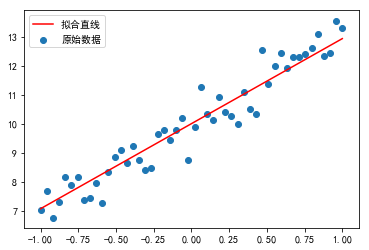

In [13]:
#模型的预测输出
y_hat = sess.run(y_hat, {x: x_train, y: y_train})
plt.scatter(x_train, y_train, label = '原始数据')
plt.plot(x_train, y_hat, c='r', label = '拟合直线')
#显示图例
plt.legend()
plt.show()

In [14]:
sess.close()                #关闭对话
tf.reset_default_graph()    #图复位